In [1]:
# http://learn.astropy.org/FITS-images.html

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os 
import glob

In [2]:
from astropy.utils.data import download_file
from astropy.io import fits

Very simple script which shows how to 

* combine images, 
* make a master bias and flat 
* process data using this master bias and flat. 


In [3]:
#ON IAP computers, set the path to this:
#data_dir = "/poubelles/broque1NS/tmp/hjmcc/tpnocturne-2019"

data_dir = "/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/data-tpnocturne-2021/"
output_dir = "/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/"

In [4]:
image_file = os.path.join(data_dir,'Bias/Bias_1_secs_2021-11-22T18-10-46_001.fits')

In [5]:
image_file

'/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/data-tpnocturne-2021/Bias/Bias_1_secs_2021-11-22T18-10-46_001.fits'

In [6]:
hdu_list = fits.open(image_file)

In [7]:
hdu_list.info()

Filename: /Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/data-tpnocturne-2021/Bias/Bias_1_secs_2021-11-22T18-10-46_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (3352, 2532)   int16 (rescales to uint16)   


In [8]:
image_data = hdu_list[0].data

In [9]:
np.median(image_data[1000:2000,100:2000])

965.0

In [10]:
image_data = fits.getdata(image_file)
from matplotlib.colors import LogNorm

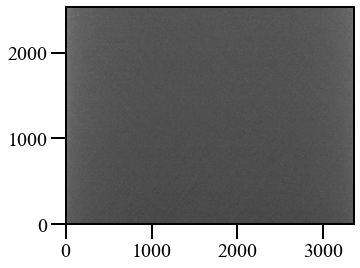

In [11]:
plt.imshow(image_data, cmap='gray', vmin=900,vmax=1100)


In [12]:
#image_list = glob.glob(data_dir+'Bias/test1_Bias_1_secs_2019*???.fits')
image_list = glob.glob('/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/data-tpnocturne-2021/Bias/Bias*fits')
np.size(image_list)

21

In [13]:
image_list[1]

'/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/data-tpnocturne-2021/Bias/Bias_1_secs_2021-12-02T16-54-09_019.fits'

In [14]:
# The long way
image_concat = []
for image in image_list:
    image_concat.append(fits.getdata(image))

In [16]:
final_bias = np.median(image_concat, axis=0)

In [17]:
fits.getdata(image).shape

(2532, 3352)

In [18]:
#final_image = np.zeros(shape=image_concat[0].shape)
#for image in image_concat:
#    final_image += image
#final_image = final_image / 10.0 

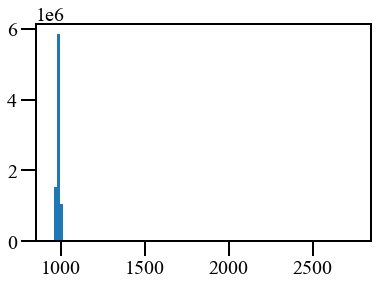

In [19]:
image_hist = plt.hist(final_bias.flatten(), bins=100)

In [20]:
np.std(final_bias[1000:2000,100:2000])

8.00442722864894

In [21]:
np.std(image_data[1000:2000,100:2000])/np.sqrt(21.0)

5.809556642117159

Note the noise in the master bias is *higher* than would expect from Poisson statistics. There
may be some other source of noise in the images (e.g., electrical noise) 

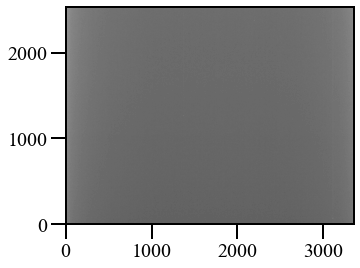

In [22]:
plt.imshow(final_bias, cmap='gray', vmin=900,vmax=1100)


In [32]:
outfile = output_dir+'median_bias2021.fits'
hdu = fits.PrimaryHDU(final_bias)
hdu.writeto(outfile, overwrite=True)

In [50]:
flat_list = glob.glob(data_dir+'/Flat/Green/Flat_Green_30_secs*fits')
np.size(flat_list)

10

In [51]:
image_concat = []
for image in flat_list:
    image_concat.append(fits.getdata(image)-final_bias)
# subtract the bias at each step. 

In [52]:
# now get final flat 
flat = np.median(image_concat, axis=0)

In [53]:
final_flat = flat/np.mean(flat) 

In [54]:
final_flat

array([[0.98223209, 0.95241827, 0.95423698, ..., 1.01094169, 1.01405947,
        1.00334209],
       [0.97606147, 0.95780944, 0.95780944, ..., 1.03354563, 1.0069795 ,
        0.99918504],
       [0.9385831 , 0.94020695, 0.92780076, ..., 1.01405947, 1.01743707,
        1.00327713],
       ...,
       [0.93975227, 0.90487206, 0.92305913, ..., 0.91571935, 0.93072369,
        0.90441738],
       [0.92111052, 0.90266362, 0.92286427, ..., 0.90941882, 0.92812553,
        0.92663159],
       [0.92124042, 0.90357298, 0.90876929, ..., 0.90246876, 0.90246876,
        0.92150024]])

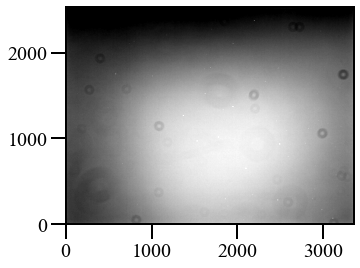

In [55]:
plt.imshow(final_flat, cmap='gray', vmin=0.9,vmax=1.1)


In [56]:
outfile = output_dir+'final_flatGreen.fits'
hdu = fits.PrimaryHDU(final_flat)
hdu.writeto(outfile, overwrite=True)

In [57]:
image_list = glob.glob(data_dir+'Light/Green/M_57*30*fits')
np.size(image_list)

16

In [58]:
final_flat_trim=final_flat[:,1:]

In [59]:
final_bias_trim=final_bias[:,1:]

In [60]:
fits.getdata(image).shape

(2532, 3352)

In [61]:
import pathlib
#print(pathlib.Path(image).suffix)
filename,file_extension=os.path.splitext(image)
output_dir+os.path.basename(filename)+'_pr.fits'

'/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/Flat_Green_30_secs_2021-12-02T17-42-59_007_pr.fits'

Now process all images with this master flat and master bias. 

In [62]:
image_concat = []
for image in image_list:
#    print(fits.getdata(image).shape)
    processed = (fits.getdata(image)-final_bias_trim)/final_flat_trim
    image_concat.append(processed) 
    filename,file_extension=os.path.splitext(image)
    outfile=output_dir+os.path.basename(filename)+'_pr.fits'
    hdu = fits.PrimaryHDU(processed)
    hdu.writeto(outfile, overwrite=True)
    print(outfile)


/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-05-49_014_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-02-36_008_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T19-24-57_004_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T19-25-29_005_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-05-17_013_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-03-40_010_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-02-04_007_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57_Light_Green_30_secs_2021-11-29T20-06-54_016_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2021/processed/M_57